In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Analisis Penggunaan Emoji**

Pertanyaan :
1. Bagaimana penggunaan emoji berdasarkan context yang ada?
2. Apa emoji yang sering digunakan berdasarkan gender pengguna?
3. Emoji apa yang digunakan pengguna laki-laki dan perempuan untuk setiap context 'angry' dan 'love'?
4. Apakah penggunaan emoji dengan context 'angry' tetapi dengan platform yang berbeda menggunakan emoji yang sama?

### load dataset

In [2]:
df = pd.read_csv('./dataset/emoji_usage_dataset.csv')

In [3]:
df.head()

,Emoji,Context,Platform,User Age,User Gender
0,😎,angry,Snapchat,47,Male
1,👍,love,Instagram,36,Male
2,😳,angry,Snapchat,51,Male
3,😂,confusion,Facebook,64,Male
4,🤣,celebration,Snapchat,56,Female


### mengecek dataset

- cek tiap kolom
- missing value
- duplikat
- wrong format
- wrong value

#### cek tiap kolom

In [4]:
# cek dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Emoji        5000 non-null   object
 1   Context      5000 non-null   object
 2   Platform     5000 non-null   object
 3   User Age     5000 non-null   int64 
 4   User Gender  5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


In [5]:
df.describe()

,User Age
count,5000.000000
mean,38.875600
std,15.193179
min,13.000000
25%,26.000000
50%,39.000000
75%,52.000000
max,64.000000


In [6]:
# cek kolom emoji
df['Emoji'].value_counts()

Emoji
🤣     193
👏     185
😭     184
🙏     184
💕     182
💔     181
🤪     178
🎉     177
😜     176
🤔     176
😊     175
👍     175
😅     167
😏     167
🤩     165
🤗     162
😎     160
😂     160
😘     159
😇     158
😳     158
😔     157
😡     157
❤️    156
🥰     156
😢     154
🙌     152
🙄     151
😍     148
😉     147
Name: count, dtype: int64

In [7]:
df['Emoji'].unique()

array(['😎', '👍', '😳', '😂', '🤣', '💔', '😭', '😘', '😏', '😜', '😊', '🙌', '💕',
       '😇', '🤩', '❤️', '😢', '🎉', '🙏', '🤗', '😔', '🥰', '🙄', '🤔', '🤪', '😅',
       '👏', '😡', '😍', '😉'], dtype=object)

In [8]:
len(df['Emoji'].unique())

30

dalam dataset ini, terdapat 30 emoji yang digunakan

In [9]:
#cek kolom context
df['Context'].value_counts()

Context
love           538
confusion      537
cool           532
celebration    508
funny          496
angry          493
sad            490
support        478
surprise       464
happy          464
Name: count, dtype: int64

In [10]:
df['Context'].unique()

array(['angry', 'love', 'confusion', 'celebration', 'funny', 'support',
       'surprise', 'happy', 'cool', 'sad'], dtype=object)

kolom context terdapat beberapa kategori context, yaitu love, confusion, cool, celebration, funny, angry, sad, support, surprise, happy

In [11]:
#cek kolom platform
df['Platform'].value_counts()

Platform
Twitter      854
WhatsApp     838
Facebook     830
TikTok       830
Snapchat     829
Instagram    819
Name: count, dtype: int64

dalam data ini, platform yang digunakan adalah twitter, whatsapp, facebook, tiktok, snapchat, dan instagram

In [12]:
#cek kolom user age
user_age = df['User Age'].values
user_age

array([47, 36, 51, ..., 63, 15, 55], dtype=int64)

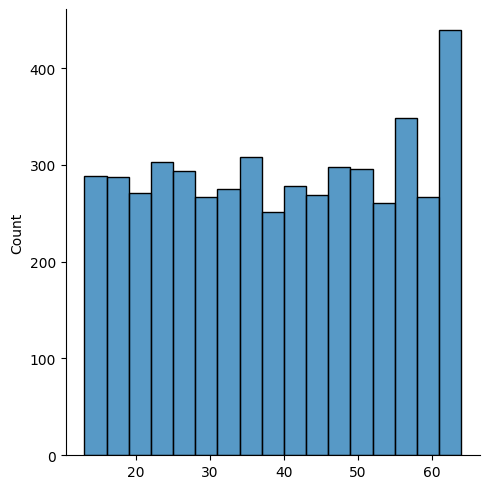

In [13]:
#cek distribusi umur 
sns.displot(user_age)

In [14]:
df['User Age'].describe()

count    5000.000000
mean       38.875600
std        15.193179
min        13.000000
25%        26.000000
50%        39.000000
75%        52.000000
max        64.000000
Name: User Age, dtype: float64

distribusi umur cukup merata, dan banyak yang ada di usia diatas 60 tahun

<Axes: xlabel='User Gender', ylabel='count'>

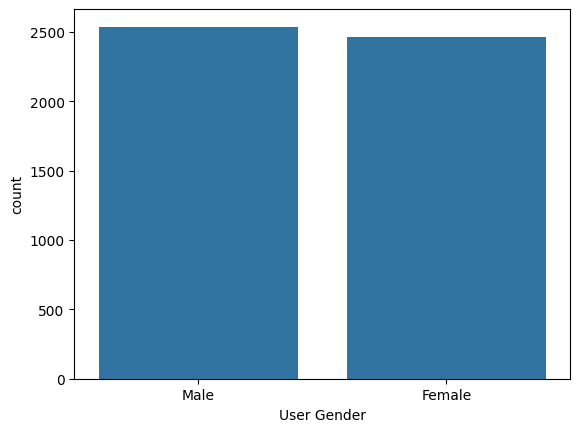

In [15]:
#cek kolom user gender
sns.countplot(x='User Gender', data=df)

antara perempuan dan laki-laki, cukup imbang, tetapi lebih banyak laki-laki

#### missing value

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Emoji        5000 non-null   object
 1   Context      5000 non-null   object
 2   Platform     5000 non-null   object
 3   User Age     5000 non-null   int64 
 4   User Gender  5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


In [17]:
df.isnull().sum()

Emoji          0
Context        0
Platform       0
User Age       0
User Gender    0
dtype: int64

dari data diatas, terdapat 5000 entries dengan 5 kolom. Data terserbut tidak memiliki missing value

#### mengecek duplikat

In [18]:
df.duplicated().sum()

82

ada 82 data yang duplikat

In [19]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997     True
4998    False
4999    False
Length: 5000, dtype: bool

In [20]:
duplikasi_seutuhnya = df[df.duplicated()]
print(duplikasi_seutuhnya.head(100))


     Emoji      Context   Platform  User Age User Gender
629      🙄  celebration   Facebook        21      Female
705      🤪        happy   Facebook        62      Female
879      😘         cool    Twitter        64      Female
1088     😘         cool   WhatsApp        25      Female
1132     😂         cool     TikTok        35      Female
...    ...          ...        ...       ...         ...
4904     🤩     surprise  Instagram        47        Male
4935     💕  celebration   Snapchat        32        Male
4946     🤔        angry   Facebook        30      Female
4953     💔  celebration  Instagram        36        Male
4997     😂  celebration     TikTok        63        Male

[82 rows x 5 columns]


dilihat dari hasil diatas, duplikasi yang terjadi adalah duplikasi parsial dan karena tujuan dari project ini adalah untuk melakukan analisis penggunaan, maka duplikasi tetap dipertahankan

#### cek wrong format dan wrong value

In [21]:
#mengecek tipe data tiap kolom
df.dtypes

Emoji          object
Context        object
Platform       object
User Age        int64
User Gender    object
dtype: object

In [22]:
#cek rentang nilai pada user age
df['User Age'].describe()

count    5000.000000
mean       38.875600
std        15.193179
min        13.000000
25%        26.000000
50%        39.000000
75%        52.000000
max        64.000000
Name: User Age, dtype: float64

tidak ada data yang aneh dari hasil diatas

**Hasil pengecekan dataset**
- tidak ada missing value
- terdapat 82 data duplikat, tetapi tetap dipertahankan karena project ini bertujuan untuk analisis pengelompokan penggunaan emoji, jadi data duplikat mungkin penting untuk dipertahankan. selain itu, data duplikat berjenis parsial
- tidak ada wrong format atau format yang salah
- tidak ada wrong value atau nilai yang salah

### Analisis Data

#### Bagaimana penggunaan emoji berdasarkan context yang ada?

##### context love

In [61]:
# Filter untuk konteks 'love'
love_df = df[df['Context'] == 'love']

# Hitung frekuensi setiap emoji
emoji_counts = love_df['Emoji'].value_counts()

# Tampilkan emoji yang paling banyak digunakan
most_common_emoji = emoji_counts.idxmax()
most_common_count = emoji_counts.max()

print(f"Emoji yang paling banyak digunakan dalam konteks 'love' adalah '{most_common_emoji}' dengan {most_common_count} kemunculan.")

Emoji yang paling banyak digunakan dalam konteks 'love' adalah '👍' dengan 27 kemunculan.


In [86]:
#filter untuk konteks 'love'
love_df = df[df['Context'] == 'love']

#hitung frekuensi tiap emoji
emoji_counts = love_df['Emoji'].value_counts()

Emoji
👍     27
🙏     27
🎉     26
👏     24
❤️    24
🙌     23
🤔     22
🤣     22
😂     21
🥰     21
😔     20
😎     19
😭     19
😊     18
💔     18
😉     18
😇     17
😳     16
😜     15
🤪     15
😘     15
🤗     14
💕     14
😅     13
😡     13
🤩     12
🙄     12
😏     11
😍     11
😢     11
Name: count, dtype: int64

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.p

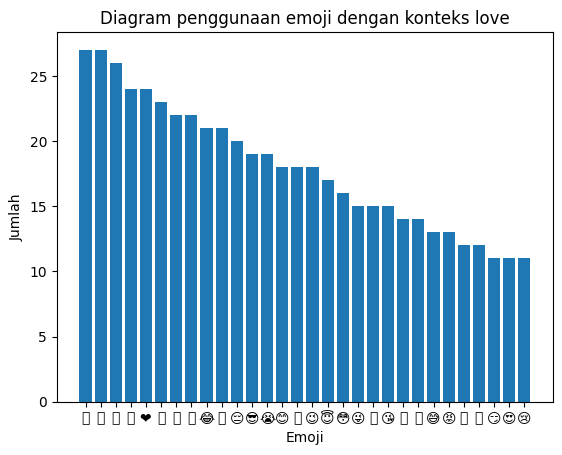

In [115]:
emoji_counts = love_df['Emoji'].value_counts()
x = emoji_counts.index
y = emoji_counts.values

plt.bar(x,y)
plt.xlabel('Emoji')
plt.ylabel('Jumlah')
plt.title('Diagram penggunaan emoji dengan konteks love')
plt.show()

In [116]:
#ambil 5 emoji terbanyak
top5_emoji = emoji_counts.head()

In [117]:
#ambil nilai tiap emoji
top5 = top5_emoji.values
top5

array([27, 27, 26, 24, 24], dtype=int64)

In [118]:
top5_emoji.index

Index(['👍', '🙏', '🎉', '👏', '❤️'], dtype='object', name='Emoji')

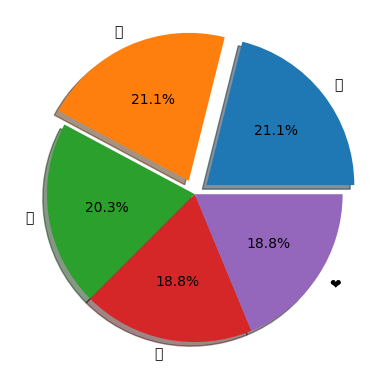

In [119]:
labels = top5_emoji.index
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0, 0, 0)

plt.pie(top5, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)
plt.show()

In [120]:
emoji_counts.head()

Emoji
👍     27
🙏     27
🎉     26
👏     24
❤️    24
Name: count, dtype: int64

##### context confusion

In [25]:
# Filter untuk konteks 'confusion'
confusion_df = df[df['Context'] == 'confusion']

# Hitung frekuensi setiap emoji
emoji_counts = confusion_df['Emoji'].value_counts()

# Tampilkan emoji yang paling banyak digunakan
most_common_emoji = emoji_counts.idxmax()
most_common_count = emoji_counts.max()

print(f"Emoji yang paling banyak digunakan dalam konteks 'confusion' adalah '{most_common_emoji}' dengan {most_common_count} kemunculan.")

Emoji yang paling banyak digunakan dalam konteks 'confusion' adalah '😏' dengan 27 kemunculan.


##### context cool

In [26]:
# Filter untuk konteks 'cool'
cool_df = df[df['Context'] == 'cool']

# Hitung frekuensi setiap emoji
emoji_counts = cool_df['Emoji'].value_counts()

# Tampilkan emoji yang paling banyak digunakan
most_common_emoji = emoji_counts.idxmax()
most_common_count = emoji_counts.max()

print(f"Emoji yang paling banyak digunakan dalam konteks 'cool' adalah '{most_common_emoji}' dengan {most_common_count} kemunculan.")

Emoji yang paling banyak digunakan dalam konteks 'cool' adalah '🤩' dengan 25 kemunculan.


##### context celebration

In [27]:
# Filter untuk konteks 'celebration'
confusion_df = df[df['Context'] == 'celebration']

# Hitung frekuensi setiap emoji
emoji_counts = confusion_df['Emoji'].value_counts()

# Tampilkan emoji yang paling banyak digunakan
most_common_emoji = emoji_counts.idxmax()
most_common_count = emoji_counts.max()

print(f"Emoji yang paling banyak digunakan dalam konteks 'celebration' adalah '{most_common_emoji}' dengan {most_common_count} kemunculan.")

Emoji yang paling banyak digunakan dalam konteks 'celebration' adalah '😘' dengan 24 kemunculan.


##### context funny

In [28]:
# Filter untuk konteks 'funny'
funny_df = df[df['Context'] == 'funny']

# Hitung frekuensi setiap emoji
emoji_counts = funny_df['Emoji'].value_counts()

# Tampilkan emoji yang paling banyak digunakan
most_common_emoji = emoji_counts.idxmax()
most_common_count = emoji_counts.max()

print(f"Emoji yang paling banyak digunakan dalam konteks 'funny' adalah '{most_common_emoji}' dengan {most_common_count} kemunculan.")

Emoji yang paling banyak digunakan dalam konteks 'funny' adalah '🙏' dengan 25 kemunculan.


##### context angry

In [29]:
angry_df = df[df['Context'] == 'angry']

emoji_counts = angry_df['Emoji'].value_counts()

most_common_emoji = emoji_counts.idxmax()
most_common_count = emoji_counts.max()

print(f"Emoji yang paling banyak digunakan dalam konteks 'angry' adalah '{most_common_emoji}' dengan {most_common_count} kemunculan.")

Emoji yang paling banyak digunakan dalam konteks 'angry' adalah '🤔' dengan 22 kemunculan.


##### context sad

In [30]:
sad_df = df[df['Context'] == 'sad']

emoji_counts = sad_df['Emoji'].value_counts()

most_common_emoji = emoji_counts.idxmax()
most_common_count = emoji_counts.max()

print(f"Emoji yang paling banyak digunakan dalam konteks 'sad' adalah '{most_common_emoji}' dengan {most_common_count} kemunculan.")

Emoji yang paling banyak digunakan dalam konteks 'sad' adalah '😜' dengan 22 kemunculan.


##### context support

In [31]:
support_df = df[df['Context'] == 'support']

emoji_counts = support_df['Emoji'].value_counts()

most_common_emoji = emoji_counts.idxmax()
most_common_count = emoji_counts.max()

print(f"Emoji yang paling banyak digunakan dalam konteks 'support' adalah '{most_common_emoji}' dengan {most_common_count} kemunculan.")

Emoji yang paling banyak digunakan dalam konteks 'support' adalah '💕' dengan 23 kemunculan.


##### context surprise

In [32]:
surprise_df = df[df['Context'] == 'surprise']

emoji_counts = surprise_df['Emoji'].value_counts()

most_common_emoji = emoji_counts.idxmax()
most_common_count = emoji_counts.max()

print(f"Emoji yang paling banyak digunakan dalam konteks 'surprise' adalah '{most_common_emoji}' dengan {most_common_count} kemunculan.")

Emoji yang paling banyak digunakan dalam konteks 'surprise' adalah '💔' dengan 24 kemunculan.


##### context happy

In [33]:
happy_df = df[df['Context'] == 'happy']

emoji_counts = happy_df['Emoji'].value_counts()

most_common_emoji = emoji_counts.idxmax()
most_common_count = emoji_counts.max()

print(f"Emoji yang paling banyak digunakan dalam konteks 'happy' adalah '{most_common_emoji}' dengan {most_common_count} kemunculan.")

Emoji yang paling banyak digunakan dalam konteks 'happy' adalah '😡' dengan 24 kemunculan.


#### Apa emoji yang sering digunakan berdasarkan gender pengguna?

In [34]:
# Filter untuk gender
female_df = df[df['User Gender'] == 'Female']

# Hitung frekuensi setiap emoji
emoji_counts = female_df['Emoji'].value_counts()

# Tampilkan emoji yang paling banyak digunakan
most_common_emoji = emoji_counts.idxmax()
most_common_count = emoji_counts.max()

print(f"Emoji yang paling banyak digunakan dalam Perempuan adalah '{most_common_emoji}' dengan {most_common_count} kemunculan.")

Emoji yang paling banyak digunakan dalam Perempuan adalah '🎉' dengan 96 kemunculan.


In [35]:
# Filter untuk gender
male_df = df[df['User Gender'] == 'Male']

# Hitung frekuensi setiap emoji
emoji_counts = male_df['Emoji'].value_counts()

# Tampilkan emoji yang paling banyak digunakan
most_common_emoji = emoji_counts.idxmax()
most_common_count = emoji_counts.max()

print(f"Emoji yang paling banyak digunakan dalam laki-laki adalah '{most_common_emoji}' dengan {most_common_count} kemunculan.")

Emoji yang paling banyak digunakan dalam laki-laki adalah '🤣' dengan 99 kemunculan.


#### Emoji apa yang digunakan pengguna laki-laki dan perempuan untuk setiap context 'angry' dan 'love'?

In [36]:
# Filter data untuk konteks 'angry' dan 'love'
angry_df = df[df['Context'] == 'angry']
love_df = df[df['Context'] == 'love']

# Pisahkan berdasarkan gender
angry_male = angry_df[angry_df['User Gender'] == 'Male']
angry_female = angry_df[angry_df['User Gender'] == 'Female']
love_male = love_df[love_df['User Gender'] == 'Male']
love_female = love_df[love_df['User Gender'] == 'Female']

# Hitung frekuensi setiap emoji
angry_male_counts = angry_male['Emoji'].value_counts().head(3)
angry_female_counts = angry_female['Emoji'].value_counts().head(3)
love_male_counts = love_male['Emoji'].value_counts().head(3)
love_female_counts = love_female['Emoji'].value_counts().head(3)

# Tampilkan hasil untuk setiap kategori
def plot_emoji_counts(counts, title):
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Emoji')
    plt.ylabel('Jumlah Penggunaan')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

print("Emoji yang digunakan laki-laki dalam konteks 'angry':")
print(angry_male_counts)
# plot_emoji_counts(angry_male_counts, "Emoji yang Digunakan Laki-Laki dalam Konteks 'Angry'")

print("Emoji yang digunakan perempuan dalam konteks 'angry':")
print(angry_female_counts)
# plot_emoji_counts(angry_female_counts, "Emoji yang Digunakan Perempuan dalam Konteks 'Angry'")

print("Emoji yang digunakan laki-laki dalam konteks 'love':")
print(love_male_counts)
# plot_emoji_counts(love_male_counts, "Emoji yang Digunakan Laki-Laki dalam Konteks 'Love'")

print("Emoji yang digunakan perempuan dalam konteks 'love':")
print(love_female_counts)
# plot_emoji_counts(love_female_counts, "Emoji yang Digunakan Perempuan dalam Konteks 'Love'")

Emoji yang digunakan laki-laki dalam konteks 'angry':
Emoji
😜    15
😭    11
🙏    11
Name: count, dtype: int64
Emoji yang digunakan perempuan dalam konteks 'angry':
Emoji
🤪    13
😢    12
🙄    11
Name: count, dtype: int64
Emoji yang digunakan laki-laki dalam konteks 'love':
Emoji
👍    14
👏    14
🙌    13
Name: count, dtype: int64
Emoji yang digunakan perempuan dalam konteks 'love':
Emoji
🙏    21
😂    16
🤔    16
Name: count, dtype: int64


#### Apakah penggunaan emoji dengan context 'angry' tetapi dengan platform yang berbeda menggunakan emoji yang sama?

In [37]:
# Filter data untuk konteks 'angry' dan 'love'
angry_df = df[df['Context'] == 'angry']

# Pisahkan berdasarkan gender
angry_x = angry_df[angry_df['Platform'] == 'Twitter']
angry_wa = angry_df[angry_df['Platform'] == 'WhatsApp']
angry_fb = angry_df[angry_df['Platform'] == 'Facebook']
angry_tt = angry_df[angry_df['Platform'] == 'TikTok']
angry_sc = angry_df[angry_df['Platform'] == 'Snapchat']
angry_ig = angry_df[angry_df['Platform'] == 'Instagram']


# Hitung frekuensi setiap emoji
angry_x_counts = angry_x['Emoji'].value_counts().head(3)
angry_wa_counts = angry_wa['Emoji'].value_counts().head(3)
angry_fb_counts = angry_fb['Emoji'].value_counts().head(3)
angry_tt_counts = angry_tt['Emoji'].value_counts().head(3)
angry_sc_counts = angry_sc['Emoji'].value_counts().head(3)
angry_ig_counts = angry_ig['Emoji'].value_counts().head(3)



# Tampilkan hasil untuk setiap kategori
def plot_emoji_counts(counts, title):
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Emoji')
    plt.ylabel('Jumlah Penggunaan')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

print("Emoji yang digunakan pengguna twitter dalam konteks 'angry':")
print(angry_male_counts)
# plot_emoji_counts(angry_x_counts, "Emoji yang Digunakan pengguna twitter dalam Konteks 'Angry'")

print("Emoji yang digunakan pengguna WhatsApp dalam konteks 'angry':")
print(angry_wa_counts)
# plot_emoji_counts(angry_x_counts, "Emoji yang Digunakan pengguna twitter dalam Konteks 'Angry'")

print("Emoji yang digunakan pengguna Facebook dalam konteks 'angry':")
print(angry_fb_counts)
# plot_emoji_counts(angry_x_counts, "Emoji yang Digunakan pengguna twitter dalam Konteks 'Angry'")


Emoji yang digunakan pengguna twitter dalam konteks 'angry':
Emoji
😜    15
😭    11
🙏    11
Name: count, dtype: int64
Emoji yang digunakan pengguna WhatsApp dalam konteks 'angry':
Emoji
😅    7
🤔    5
💔    5
Name: count, dtype: int64
Emoji yang digunakan pengguna Facebook dalam konteks 'angry':
Emoji
😳    6
😡    5
😉    5
Name: count, dtype: int64


In [38]:
print("Emoji yang digunakan pengguna TikTok dalam konteks 'angry':")
print(angry_tt_counts)
# plot_emoji_counts(angry_x_counts, "Emoji yang Digunakan pengguna twitter dalam Konteks 'Angry'")

print("Emoji yang digunakan pengguna Snapchat dalam konteks 'angry':")
print(angry_sc_counts)
# plot_emoji_counts(angry_x_counts, "Emoji yang Digunakan pengguna twitter dalam Konteks 'Angry'")

print("Emoji yang digunakan pengguna Instagram dalam konteks 'angry':")
print(angry_ig_counts)
# plot_emoji_counts(angry_x_counts, "Emoji yang Digunakan pengguna twitter dalam Konteks 'Angry'")


Emoji yang digunakan pengguna TikTok dalam konteks 'angry':
Emoji
😊    7
😭    6
🎉    5
Name: count, dtype: int64
Emoji yang digunakan pengguna Snapchat dalam konteks 'angry':
Emoji
🙏    8
😏    5
😡    5
Name: count, dtype: int64
Emoji yang digunakan pengguna Instagram dalam konteks 'angry':
Emoji
😏    5
🤔    5
🎉    4
Name: count, dtype: int64


### Kesimpulan

tarik sendiri, males